In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(26-01-2024).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(13-11-2023 Updated).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(04-12-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(22-11-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(15-11-2023 Updated).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(03-01-2024).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(28-11-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(05-12-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(20-11-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game(27-12-2023).csv
/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/NBA_2024_per_game

# Data Collecting & Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define base path for Kaggle dataset
base_path = "/kaggle/input/nba-player-stats-dataset-for-the-2023-2024/"

# List of file names
file_names = [
    "NBA_2024_per_game(03-01-2024).csv",
    "NBA_2024_per_game(04-12-2023).csv",
    "NBA_2024_per_game(05-12-2023).csv",
    "NBA_2024_per_game(13-11-2023 Updated).csv",
    "NBA_2024_per_game(15-11-2023 Updated).csv",
    "NBA_2024_per_game(17-11-2023).csv",
    "NBA_2024_per_game(20-11-2023).csv",
    "NBA_2024_per_game(22-11-2023).csv",
    "NBA_2024_per_game(26-01-2024).csv",
    "NBA_2024_per_game(27-12-2023).csv",
    "NBA_2024_per_game(28-11-2023).csv"
]

# Function to extract date from file name
def extract_date(filename):
    match = re.search(r"\((\d{2}-\d{2}-\d{4})", filename)
    if match:
        return pd.to_datetime(match.group(1), format="%d-%m-%Y")
    return None

# Load data with Date column
dfs = []
for file in file_names:
    file_path = base_path + file  # Add prefix path
    df = pd.read_csv(file_path)
    df["Date"] = extract_date(file)
    dfs.append(df)

# Combine all data
nba_data = pd.concat(dfs, ignore_index=True)

# Display dataset info
print(nba_data.info())

# Check for missing values
print(nba_data.isnull().sum())

# Fill missing values in shooting percentage columns with median values
shooting_cols = ["FG%", "3P%", "2P%", "eFG%", "FT%"]
nba_data[shooting_cols] = nba_data[shooting_cols].apply(lambda col: col.fillna(col.median()))

# Verify missing values are handled
print(nba_data.isnull().sum())

# Save processed dataset for future modeling
nba_data.to_csv("NBA_2024_Processed.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522 entries, 0 to 5521
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Player  5522 non-null   object        
 1   Pos     5522 non-null   object        
 2   Age     5522 non-null   int64         
 3   Tm      5522 non-null   object        
 4   G       5522 non-null   int64         
 5   GS      5522 non-null   int64         
 6   MP      5522 non-null   float64       
 7   FG      5522 non-null   float64       
 8   FGA     5522 non-null   float64       
 9   FG%     5410 non-null   float64       
 10  3P      5522 non-null   float64       
 11  3PA     5522 non-null   float64       
 12  3P%     4889 non-null   float64       
 13  2P      5522 non-null   float64       
 14  2PA     5522 non-null   float64       
 15  2P%     5283 non-null   float64       
 16  eFG%    5410 non-null   float64       
 17  FT      5522 non-null   float64       
 18  FTA     

# 1. Who are the Most Impactful Players?
We identify the Top 10 players in Points Per Game (PPG), Assists Per Game (AST), and Total Rebounds Per Game (TRB).

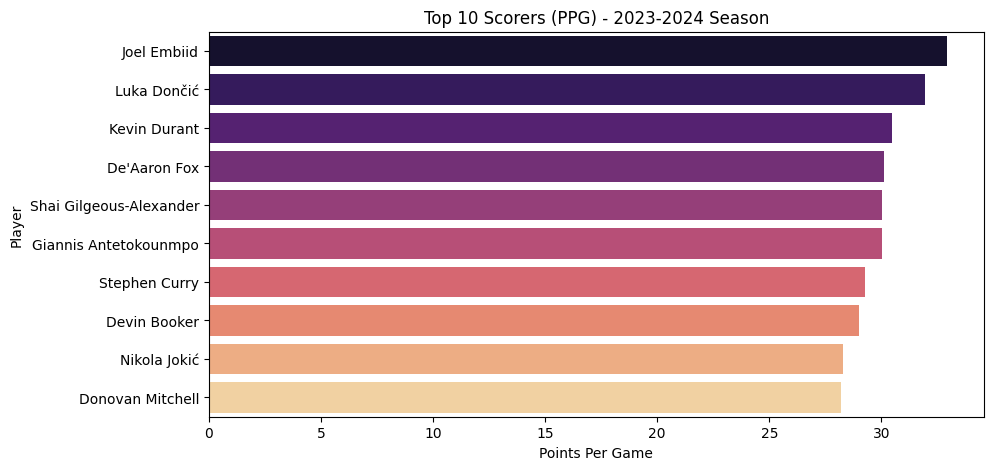

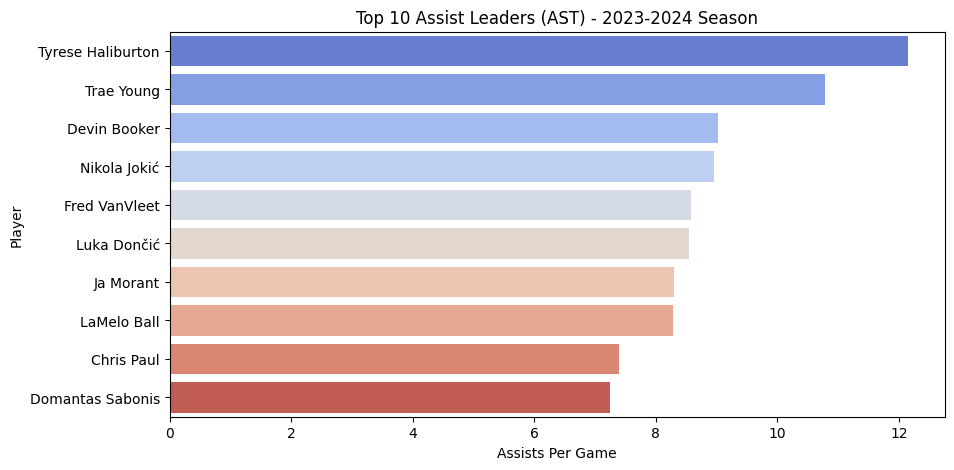

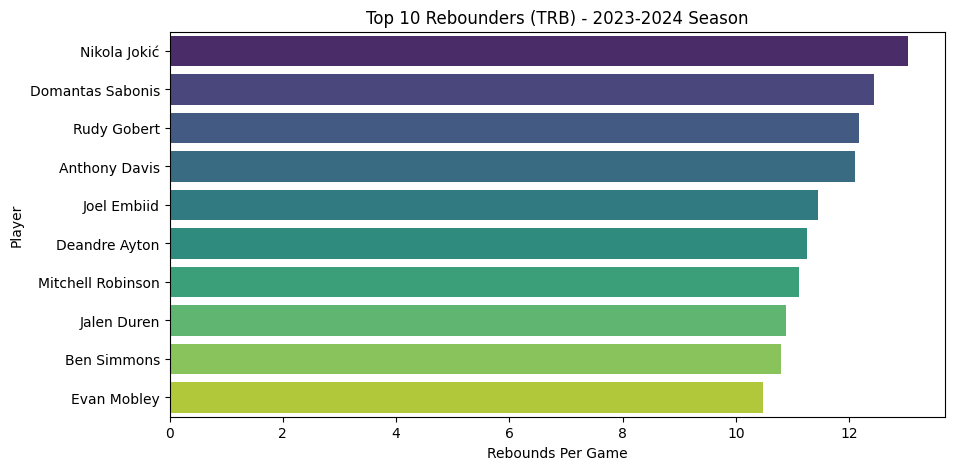

Player
Joel Embiid                32.927273
Luka Dončić                31.963636
Kevin Durant               30.472727
De'Aaron Fox               30.100000
Shai Gilgeous-Alexander    30.018182
Giannis Antetokounmpo      30.009091
Stephen Curry              29.263636
Devin Booker               28.981818
Nikola Jokić               28.281818
Donovan Mitchell           28.200000
Name: PTS, dtype: float64
Player
Tyrese Haliburton    12.145455
Trae Young           10.781818
Devin Booker          9.018182
Nikola Jokić          8.954545
Fred VanVleet         8.581818
Luka Dončić           8.545455
Ja Morant             8.300000
LaMelo Ball           8.281818
Chris Paul            7.400000
Domantas Sabonis      7.254545
Name: AST, dtype: float64
Player
Nikola Jokić         13.027273
Domantas Sabonis     12.436364
Rudy Gobert          12.163636
Anthony Davis        12.090909
Joel Embiid          11.445455
Deandre Ayton        11.245455
Mitchell Robinson    11.118182
Jalen Duren          10.881818

In [20]:
# Top 10 Players in PPG, AST, TRB
top_ppg = nba_data.groupby("Player")["PTS"].mean().sort_values(ascending=False).head(10)
top_ast = nba_data.groupby("Player")["AST"].mean().sort_values(ascending=False).head(10)
top_trb = nba_data.groupby("Player")["TRB"].mean().sort_values(ascending=False).head(10)

# Visualization: Top 10 Scorers
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ppg.values, y=top_ppg.index, palette="magma")
plt.title("Top 10 Scorers (PPG) - 2023-2024 Season")
plt.xlabel("Points Per Game")
plt.ylabel("Player")
plt.show()

# Visualization: Top 10 Assist Leaders
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ast.values, y=top_ast.index, palette="coolwarm")
plt.title("Top 10 Assist Leaders (AST) - 2023-2024 Season")
plt.xlabel("Assists Per Game")
plt.ylabel("Player")
plt.show()

# Visualization: Top 10 Rebounders
plt.figure(figsize=(10, 5))
sns.barplot(x=top_trb.values, y=top_trb.index, palette="viridis")
plt.title("Top 10 Rebounders (TRB) - 2023-2024 Season")
plt.xlabel("Rebounds Per Game")
plt.ylabel("Player")
plt.show()

print(top_ppg)
print(top_ast)
print(top_trb)

# 2 How Do Player Performances Fluctuate?
We analyze weekly trends in Points Per Game (PPG), Assists (AST), and Rebounds (TRB) to see if player performance is consistent or volatile.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


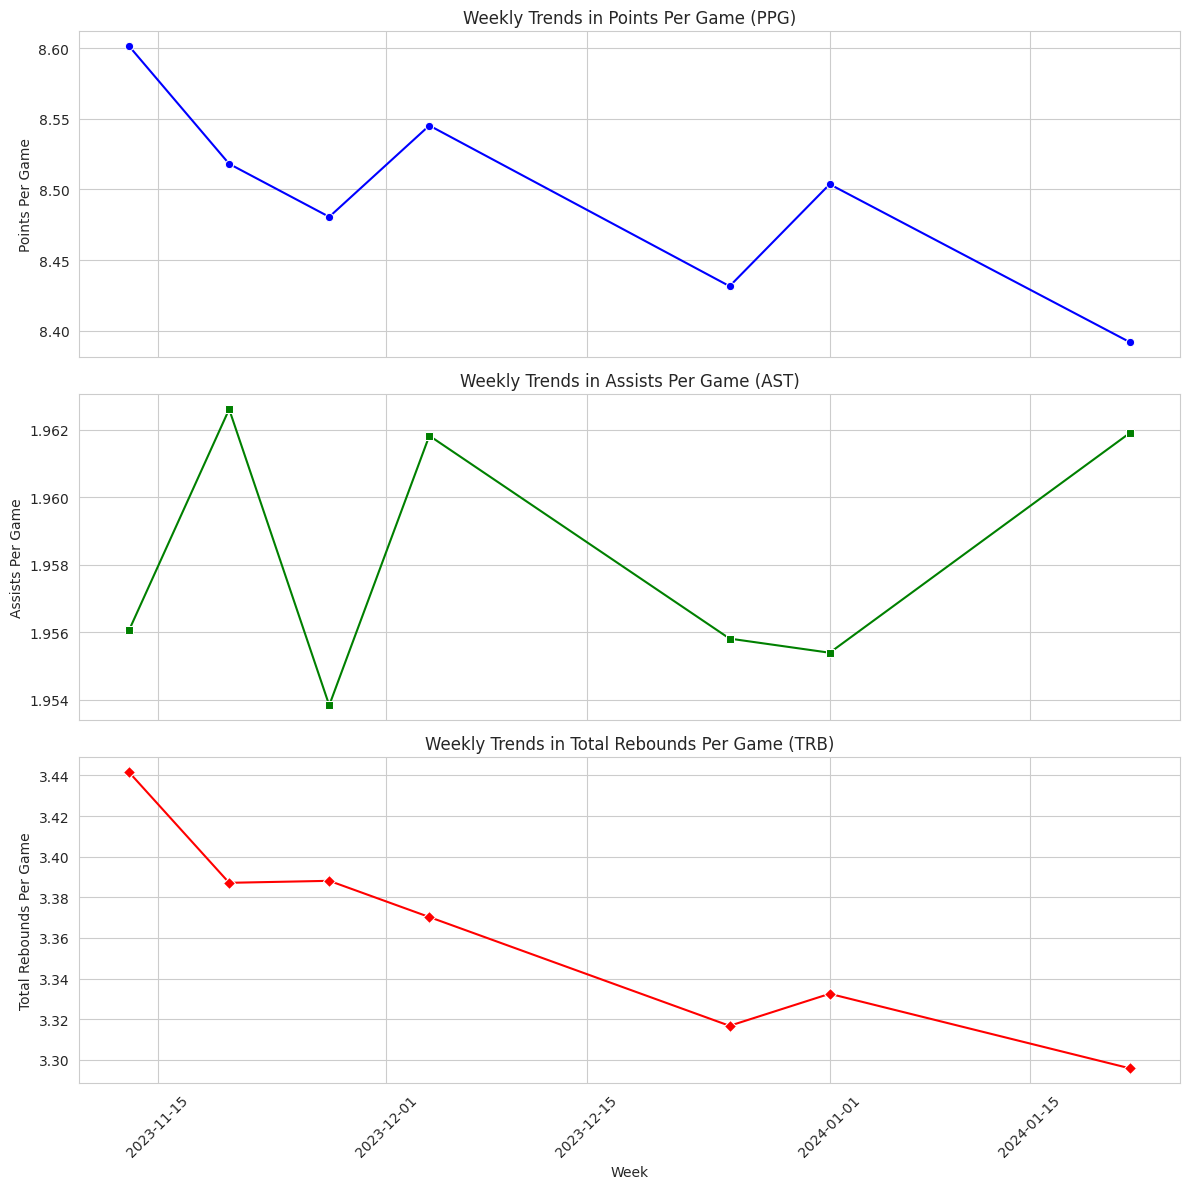

        Week       PTS       AST       TRB
0 2023-11-13  8.601347  1.956060  3.441531
1 2023-11-20  8.518126  1.962616  3.387127
2 2023-11-27  8.480645  1.953831  3.388105
3 2023-12-04  8.545229  1.961829  3.370278
4 2023-12-25  8.431619  1.955810  3.316762
5 2024-01-01  8.503717  1.955390  3.332528
6 2024-01-22  8.392000  1.961913  3.295826


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime and sort by Date
nba_data["Date"] = pd.to_datetime(nba_data["Date"])
nba_data = nba_data.sort_values(by="Date")

# Create a new "Week" column, using the start of each week (Monday)
nba_data["Week"] = nba_data["Date"] - pd.to_timedelta(nba_data["Date"].dt.weekday, unit="D")

# Group by Week and calculate average performance per week
weekly_performance = nba_data.groupby("Week")[["PTS", "AST", "TRB"]].mean().reset_index()

# Set the style
sns.set_style("whitegrid")

# Create subplots for better clarity
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Points Per Game (PPG)
sns.lineplot(ax=axes[0], x=weekly_performance["Week"], y=weekly_performance["PTS"], marker="o", color="blue")
axes[0].set_title("Weekly Trends in Points Per Game (PPG)")
axes[0].set_ylabel("Points Per Game")
axes[0].grid(True)

# Plot Assists Per Game (AST)
sns.lineplot(ax=axes[1], x=weekly_performance["Week"], y=weekly_performance["AST"], marker="s", color="green")
axes[1].set_title("Weekly Trends in Assists Per Game (AST)")
axes[1].set_ylabel("Assists Per Game")
axes[1].grid(True)

# Plot Total Rebounds Per Game (TRB)
sns.lineplot(ax=axes[2], x=weekly_performance["Week"], y=weekly_performance["TRB"], marker="D", color="red")
axes[2].set_title("Weekly Trends in Total Rebounds Per Game (TRB)")
axes[2].set_ylabel("Total Rebounds Per Game")
axes[2].set_xlabel("Week")
axes[2].grid(True)

# Improve spacing
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the weekly performance data
print(weekly_performance)


# 3. What Factors Influence Performance?
To understand which stats contribute most to player success, we analyze the correlation between key performance metrics.

Interpretation:
- A high correlation between PTS & AST may indicate playmakers contribute heavily to scoring.
- A moderate correlation between FG% & PTS could show that efficient shooters tend to score more.
- A weak correlation between FT% & PTS suggests that free-throw efficiency alone doesn’t predict overall scoring ability

Correlation Matrix:
          PTS       AST       TRB       FG%       3P%
PTS  1.000000  0.759631  0.652871  0.238878  0.209207
AST  0.759631  1.000000  0.463201  0.097718  0.126856
TRB  0.652871  0.463201  1.000000  0.314605  0.084967
FG%  0.238878  0.097718  0.314605  1.000000  0.378384
3P%  0.209207  0.126856  0.084967  0.378384  1.000000


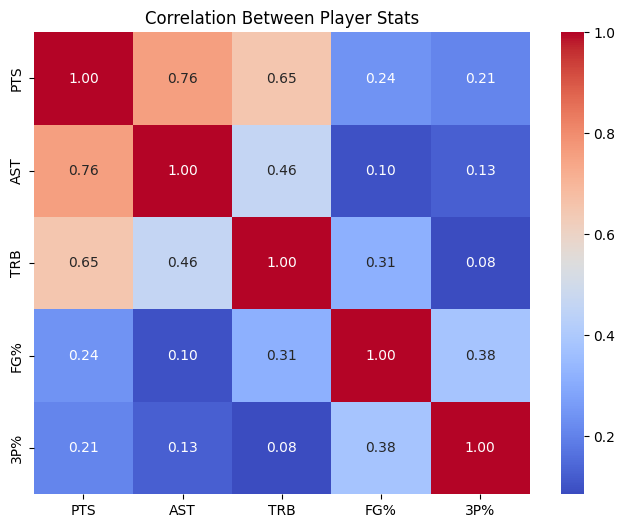

In [24]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = df[["PTS", "AST", "TRB", "FG%", "3P%"]].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation using a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Player Stats")
plt.show()


# 4. Are Players Becoming More Efficient?

Interpretation:

- If FG% increases over time, it means players are adapting and improving their shot selection.
- If FG% fluctuates, it could mean defensive strategies or fatigue impact shooting efficiency.


Monthly FG% Averages:
     Month       FG%
0  2023-11  0.446010
1  2023-12  0.446415
2  2024-01  0.452210


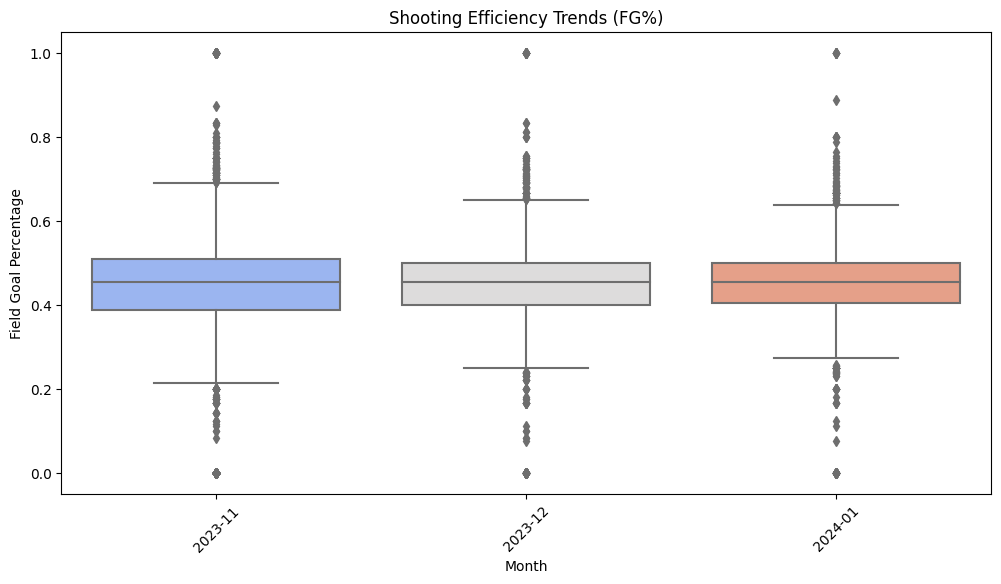

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month for analysis
nba_data["Month"] = nba_data["Date"].dt.strftime("%Y-%m")

# Compute monthly FG% average
monthly_fg = nba_data.groupby("Month")["FG%"].mean().reset_index()

# Print FG% values per month
print("Monthly FG% Averages:")
print(monthly_fg)

# Shooting Efficiency Over Time (FG%)
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="FG%", data=nba_data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Shooting Efficiency Trends (FG%)")
plt.xlabel("Month")
plt.ylabel("Field Goal Percentage")
plt.show()


# Statistical Tests - Anova
Q: Is there a significant difference in player performance across months?
We use the ANOVA (Analysis of Variance) test to check if player performance metrics (PPG, AST, TRB) significantly change across months.

Interpretation:
- If p-value < 0.05, performance significantly changes across months (e.g., players get better or worse).
- If p-value ≥ 0.05, performance is consistent across months (not much variation).

In [8]:
import scipy.stats as stats

# Define function for ANOVA test
def perform_anova(data, metric):
    groups = [group[metric].dropna().values for name, group in data.groupby("Month")]
    stat, p_value = stats.f_oneway(*groups)
    return stat, p_value

# Apply ANOVA on PPG, AST, TRB
metrics = ["PTS", "AST", "TRB"]
for metric in metrics:
    stat, p_value = perform_anova(nba_data, metric)
    print(f"ANOVA for {metric}: F-statistic = {stat:.2f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"🔹 Significant difference in {metric} across months (p < 0.05)\n")
    else:
        print(f"⚪ No significant difference in {metric} across months (p ≥ 0.05)\n")


ANOVA for PTS: F-statistic = 0.09, p-value = 0.9136
⚪ No significant difference in PTS across months (p ≥ 0.05)

ANOVA for AST: F-statistic = 0.00, p-value = 0.9995
⚪ No significant difference in AST across months (p ≥ 0.05)

ANOVA for TRB: F-statistic = 0.69, p-value = 0.4995
⚪ No significant difference in TRB across months (p ≥ 0.05)



# Regression Analysis: Predicting Future Performance

- Q: Can we predict a player’s PPG based on assists, rebounds, and efficiency?
- We use Multiple Linear Regression to predict PPG (Points Per Game) based on AST (Assists), TRB (Rebounds), FG% (Field Goal %), and 3P% (Three-Point %).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant features and target
features = ["AST", "TRB", "FG%", "3P%"]
target = "PTS"

# Drop rows with missing values
nba_regression_data = nba_data.dropna(subset=[target] + features)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    nba_regression_data[features], nba_regression_data[target], test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"🔹 Regression Model Performance:")
print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
print(f"  - Mean Squared Error (MSE): {mse:.2f}")
print(f"  - R-squared (R²): {r2:.2f}")

# Display coefficients
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print("\n🔹 Feature Impact on PPG:")
print(coefficients)


🔹 Regression Model Performance:
  - Mean Absolute Error (MAE): 2.77
  - Mean Squared Error (MSE): 14.98
  - R-squared (R²): 0.70

🔹 Feature Impact on PPG:
  Feature  Coefficient
0     AST     2.136148
1     TRB     1.018624
2     FG%     1.770871
3     3P%     3.846524


MAE: 2.81, MSE: 15.39, R²: 0.70


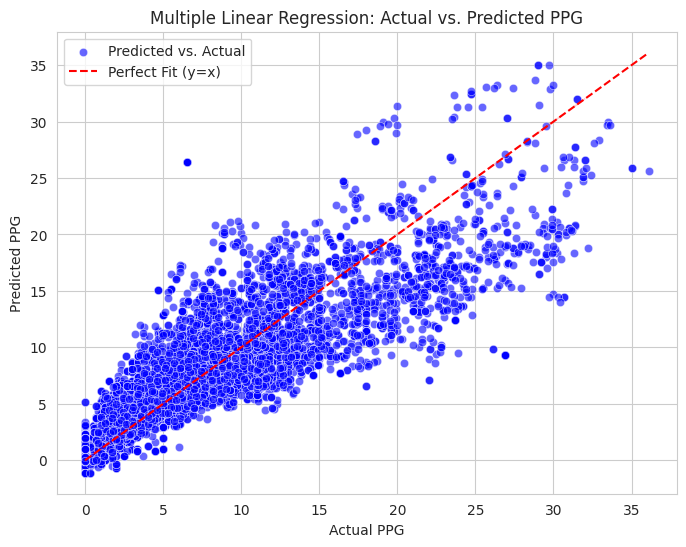

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target variable
X = nba_data[["AST", "TRB", "FG%", "3P%"]]
y = nba_data["PTS"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model performance
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print metrics
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Scatter plot: Actual vs. Predicted PPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color="blue", alpha=0.6, label="Predicted vs. Actual")
sns.lineplot(x=y, y=y, color="red", linestyle="dashed", label="Perfect Fit (y=x)")

# Formatting
plt.xlabel("Actual PPG")
plt.ylabel("Predicted PPG")
plt.title("Multiple Linear Regression: Actual vs. Predicted PPG")
plt.legend()
plt.grid(True)
plt.show()


# What’s Next? How Can We Use This?
Now that we have key insights, let's turn them into actionable recommendations for teams, analysts, or bettors.

## Advanced Player Scoring Prediction
- Goal: Predict which players will increase/decrease in scoring next month based on AST, 3P%, FG%, and TRB trends.
- How:
  - Use time series forecasting (ARIMA/LSTM) to predict 3P% changes.
  - Identify players who are improving their AST and FG% for scoring potential.
  - Run simulations to forecast PPG for top 50 scorers.

In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = nba_data

# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

# Identify the latest month and select top 10 players based on PTS
latest_month = df["Date"].max()
latest_data = df[df["Date"] == latest_month]
top_10_players = latest_data.nlargest(10, "PTS")["Player"].tolist()

# Filter dataset for Top 10 Players
df_top10 = df[df["Player"].isin(top_10_players)]

# Function to forecast feature trends using ARIMA
def forecast_feature(df, player, feature, steps=4):
    player_df = df[df["Player"] == player].set_index("Date")[feature]
    
    if len(player_df) < 5:  # Avoid fitting ARIMA on very small data
        return np.full(steps, player_df.mean())  # Use mean instead of ARIMA

    model = ARIMA(player_df, order=(1, 1, 1))  
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=steps)
    return forecast.values

# Generate future feature values (4 future months)
future_dates = pd.date_range(start=latest_month, periods=5, freq="ME")[1:]
future_predictions = []

for player in top_10_players:
    forecast_ast = forecast_feature(df_top10, player, "AST", steps=4)
    forecast_trb = forecast_feature(df_top10, player, "TRB", steps=4)
    forecast_fg = forecast_feature(df_top10, player, "FG%", steps=4)
    forecast_3p = forecast_feature(df_top10, player, "3P%", steps=4)
    
    for i, date in enumerate(future_dates):
        future_predictions.append({
            "Player": player,
            "Date": date,
            "AST": forecast_ast[i],
            "TRB": forecast_trb[i],
            "FG%": forecast_fg[i],
            "3P%": forecast_3p[i],
        })

df_future_features = pd.DataFrame(future_predictions)

# Train a separate Linear Regression model for each player
player_predictions = []
metrics = {}

for player in top_10_players:
    player_data = df_top10[df_top10["Player"] == player]

    if len(player_data) < 5:  # Avoid training on very small data
        continue

    X_train = player_data[["AST", "TRB", "FG%", "3P%"]]
    y_train = player_data["PTS"]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict future PTS using player's individual model
    future_data = df_future_features[df_future_features["Player"] == player]
    future_data["Predicted_PTS"] = model.predict(future_data[["AST", "TRB", "FG%", "3P%"]])

    # Store results
    player_predictions.append(future_data)

    # Evaluation Metrics for each player
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100

    metrics[player] = {
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R2": round(r2, 2),
        "MAPE": round(mape, 2)
    }

# Combine past & future data
df_future_combined = pd.concat(player_predictions)
df_future_combined["Actual_PTS"] = np.nan  # No actual PTS for future dates
df_top10["Predicted_PTS"] = np.nan  # No predictions for past data

df_combined = pd.concat([df_top10, df_future_combined])

# Define unique colors for each player dynamically
unique_colors = px.colors.qualitative.Set1  
player_colors = {player: unique_colors[i % len(unique_colors)] for i, player in enumerate(top_10_players)}

# Visualization using Plotly
fig = go.Figure()

for player in top_10_players:
    player_data = df_combined[df_combined["Player"] == player]

    # Actual PTS Line (Solid)
    fig.add_trace(go.Scatter(
        x=player_data["Date"], y=player_data["PTS"],
        mode="lines", name=f"{player} - Actual",
        line=dict(color=player_colors[player], width=2)
    ))

    # Predicted PTS Line (Dashed)
    fig.add_trace(go.Scatter(
        x=player_data["Date"], y=player_data["Predicted_PTS"],
        mode="lines", name=f"{player} - Predicted",
        line=dict(color=player_colors[player], dash="dash", width=2)
    ))

# Formatting
fig.update_layout(
    title="Actual vs. Predicted PTS Over Time for Top 10 Players",
    xaxis_title="Date",
    yaxis_title="Points Per Game (PTS)",
    legend_title="Legend",
    template="plotly_dark",
    hovermode="x unified"
)

fig.show()

# Print Predicted Values
print("\n🔮 Future PTS Predictions:")
print(df_future_combined)

# Print evaluation metrics per player
print("\n🔹 **Evaluation Metrics per Player:**")
for player, metric_values in metrics.items():
    print(f"\n📌 {player}:")
    for metric_name, metric_value in metric_values.items():
        print(f"   {metric_name}: {metric_value}")



🔮 Future PTS Predictions:
                     Player       Date        AST        TRB       FG%  \
0               Joel Embiid 2024-02-29   5.799122  11.633071  0.539000   
1               Joel Embiid 2024-03-31   5.847147  11.614509  0.539000   
2               Joel Embiid 2024-04-30   5.824284  11.624927  0.539000   
3               Joel Embiid 2024-05-31   5.835168  11.619080  0.539000   
4               Luka Dončić 2024-02-29   9.289844   8.459409  0.482535   
5               Luka Dončić 2024-03-31   9.295390   8.499955  0.482861   
6               Luka Dončić 2024-04-30   9.292362   8.459453  0.483059   
7               Luka Dončić 2024-05-31   9.294016   8.499910  0.483179   
8     Giannis Antetokounmpo 2024-02-29   6.406463  11.921840  0.604965   
9     Giannis Antetokounmpo 2024-03-31   6.612503  12.143611  0.604969   
10    Giannis Antetokounmpo 2024-04-30   6.818121  12.365314  0.604969   
11    Giannis Antetokounmpo 2024-05-31   7.023317  12.586948  0.604969   
12  Shai Gi